In [ ]:
import pydub
import pylab as plt 
import numpy as np
from pydub import AudioSegment
import wave
import math
import os
import librosa
from scipy.io import wavfile


def mp3towav():
    # 读取mp3的波形数据
    mp3_version = AudioSegment.from_file("E:\\REC20191109103531.mp3", format = 'MP3')
    
    # 将读取的波形数据转化为wav
    #mp3_version = AudioSegment.from_mp3("E:\\REC20191109103531.mp3") # 可以根据文件不太类型导入不同from方法
    
    tp = mp3_version.set_frame_rate(8000).set_channels(1) # 设置声道和采样率
    tp.export("E:\\test.wav", format='wav', codec='pcm_s16le',bitrate="192k") # codec参数是设定16bits pcm编码器, 此参数可以省略

原始数据与10阶LPC线性预测数据对比


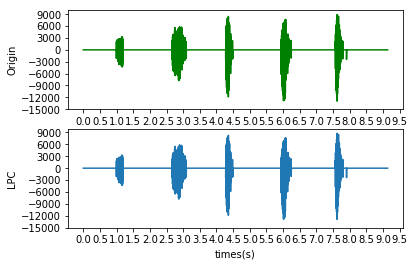

预测增益:
采用原始能量/预测能量，越接近1越好
读的数字0-4 各取5帧 预测增益
0's E0/EP is 1.230508, E0: 150114926.173627,EP:121994234.264523
1's E0/EP is 1.169531, E0: 290491729.506734,EP:248383194.537866
2's E0/EP is 1.176957, E0: 133242076.009148,EP:113208996.335206
3's E0/EP is 1.169590, E0: 777897393.244453,EP:665102391.744366
4's E0/EP is 1.118544, E0: 439886259.122752,EP:393266826.524070
连续取10帧，计算各帧预测增益
frame 296's E0 is 35138.498979, EP is 29036.864055, E0/EP is 1.210134

frame 297's E0 is 50344103.676155, EP is 43180325.546875, E0/EP is 1.165904

frame 298's E0 is 138640533.695729, EP is 110198599.269078, E0/EP is 1.258097

frame 299's E0 is 185276238.601114, EP is 153114565.537040, E0/EP is 1.210050

frame 300's E0 is 236878113.921633, EP is 194573495.525355, E0/EP is 1.217422

frame 301's E0 is 174224138.371681, EP is 153388627.486270, E0/EP is 1.135835

frame 302's E0 is 186439754.897978, EP is 158935124.730747, E0/EP is 1.173056

frame 303's E0 is 107158245.025065, EP is 96304426.458342, E0/EP is 1.112703



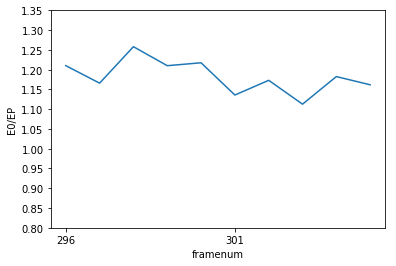

整体预测增益
origin sum energy E0 :4718027734.396956, LPC sum energy EP :4003251459.794050,E0/EP :1.178549


In [14]:
import pydub
import pylab as plt 
import numpy as np
from pydub import AudioSegment
import wave
import math
import os
import librosa
from scipy.io import wavfile


# mp3转wav 单声道 8000hz
# mp3内容为 人说了0,1,2,3,4 五个数，有间隔
def mp3towav():
    # 读取mp3的波形数据
    mp3_version = AudioSegment.from_file("E:\\REC20191109103531.mp3", format = 'MP3')
    # 将读取的波形数据转化为wav 
    tp = mp3_version.set_frame_rate(8000).set_channels(1) # 设置声道和采样率
    tp.export("E:\\test.wav", format='wav', codec='pcm_s16le',bitrate="192k") # codec参数是设定16bits pcm编码器, 此参数可以省略
    
# 用bytes格式读取wav文件，转化为numpy数组。每个采样点为一个 signed int
def initial():       
    f = wave.open("E:\\test.wav",'rb') #流
    #读取格式信息  
    #声道数, 量化位数（byte单位）, 采样频率, 采样点数
    params = f.getparams()  
    nchannels, sampwidth, framerate, nframes = params[:4]
    print("声道数   量化位数(bytes)  采样频率(HZ)  采样点数")
    print(nchannels, sampwidth, framerate, nframes)
    #读取波形数据  
    #读取声音数据，传递一个参数指定需要读取的长度（以取样点为单位）  
    str_data  = f.readframes(nframes)#返回的是二进制数据 type==bytes  如\x00\x00 两个两位16进制数，两个bytes，构成一个采样值。故用np.short
    #print(type(str_data))
    #print(str_data)
    f.close()
    
    #将波形数据转换成numpy 数组
    #需要根据声道数和量化单位，将读取的二进制数据转换为一个可以计算的数组 . bytes to signed int
    wave_data = np.fromstring(str_data,dtype = np.short)  #1D数组   np.short. 16-bit signed integer
    #print(np.min(wave_data))   #min -12971 max 8893 采样点数据最大最小值
    #print(np.max(wave_data))   #因为是单声道，所以每个采样点对应bytes就是那个时间的数据;若是双声道,为LRLRLRLR，每个时间点的左右数据;
    
    #time 也是一个数组，与wave_data配对形成系列点坐标。并画图展示
    times=np.arange(0,nframes)/framerate
    #展示未加阈值的原始数据
    print("original data 未加阈值:")
    plt.figure(1) 
    plt.plot(times,wave_data)  
    plt.ylabel("wavData")
    plt.xlabel("times(s)")  
    my_x_ticks=np.arange(0,10,0.5)
    my_yticks=np.arange(-15000,10000,1000)
    plt.yticks(my_yticks)
    plt.xticks(my_x_ticks)
    plt.show() 
    
    #阈值   设定下限 ±2000 ,低于阈值认为是噪音，删除样点
    len = wave_data.size
    for i in range(0,len):
        if (wave_data[i]<2000)and(wave_data[i]>-2000):
            wave_data[i]=0

    #展示加了阈值的数据
    print("加了阈值(2000)过滤噪音后的原始数据")
    plt.figure(1) 
    plt.plot(times,wave_data)  
    plt.ylabel("wavData")
    plt.xlabel("times(s)")  
    my_x_ticks=np.arange(0,10,0.5)
    my_yticks=np.arange(-15000,10000,1000)
    plt.yticks(my_yticks)
    plt.xticks(my_x_ticks)
    plt.show() 
    return wave_data,times

#分帧，20ms一帧，20*8000=160,160个样点一帧。 加窗 hamming加窗 预加重
def enframe(wavData, frameSize, overlap): #overlap 重叠 frameSize 一帧样点数 wavData 用样点表示的音频数据
    coeff = 0.97 # 预加重系数
    wlen = wavData.size
    step = frameSize - overlap # 距离
    frameNum= int(math.ceil(wlen / step))  #帧数
    frameData = np.zeros((frameSize, frameNum)) #frameNum列，frameSize行
    hamwin = np.hamming(frameSize)
    for i in range(frameNum):
        singleFrame = wavData[np.arange(i * step, min(i * step + frameSize, wlen))] #取一帧长的数据
        singleFrame = np.append(singleFrame[0], singleFrame[:-1] - coeff * singleFrame[1:]) # 预加重 不含最后一位-不含第一位
        frameData[:singleFrame.size, i] = singleFrame
        frameData[:, i] = hamwin * frameData[:, i] # 加窗 第i列为第i帧数据
    return frameData  #frameData为按帧存的加好窗的数据

# 计算每一帧能量  短时能量=该段语音取样值的平方和
def energy(frameData): 
    frameNum = frameData.shape[1]
    ener = np.zeros((frameNum, 1))
    for i in range(frameNum):
        singleframe = frameData[:, i]
        ener[i] = sum(singleframe * singleframe)
    return ener



def get_auto_corr(k,frameData,framelen,framenum):   #对每一帧求短时自相关函数,求和 k为系数
        ret=0
        Rn=0
        #for n in range(0,framenum): #每帧
        for n in range(295,305): #295-305帧，5.9-6.1s，读 3 的时间段
            Rn=0
            for i in range(0,framelen-k):
                #if frameData[i,m]!=0 and frameData[i+k,m]!=0:
                Rn=Rn+frameData[i,n]*frameData[i+k,n]
            ret=ret+Rn
        print("k :%d, 各帧R(K)之和: %d"%(k,ret))
        return ret


#LPC线性预测。p阶 输出LPCData为预测的分好帧加窗的数据
#先直接对原始未分帧数据预测，然后分帧
def LPCAuto(wavData, frameSize, overlap,p,times): 
    coeff = 0.97 # 预加重系数
    wlen = wavData.size
    step = frameSize - overlap # 距离
    frameNum= int(math.ceil(wlen / step))
    hamwin = np.hamming(frameSize)
    LPCData = np.zeros((framelen, frameNum))
    LPCwavData=np.zeros(wlen)
    
    
    # LPC 预测，
    #加权系数a算法：用指数，对于LPCwavData[i]，wavData[i-1]占比10^10，wavData[i-2]占比10^9，... wavData[i-10]占比10
    k=1.0/((pow(10,p+1)-10)*1.0/9)
    #print(k)
    for i in range(0,wlen):
        cnt=0
        temp=0
        powera=np.zeros(p,dtype=int)
        for j in range(1,p+1):
            if (i-j)>=0:
                cnt=cnt+1
                powera[j-1]=wavData[i-j]
        if cnt!=0:
            for h in range(0,p):
                LPCwavData[i]=powera[h]*k*(pow(10,p-h))+LPCwavData[i]
    #print(np.min(LPCwavData))
    #print(np.min(wavData))
    
    #用图像展示原始数据和LPC预测后的数据,对比
    print("原始数据与10阶LPC线性预测数据对比")
    plt.figure(1)      
    plt.title("Compare.wav's Frames")
    plt.subplot(2,1,1)
    plt.plot(times, wavData, color='green')
    plt.ylabel("Origin")
    plt.xlabel("times(s)")
    my_x_ticks=np.arange(0,10,0.5)
    my_yticks=np.arange(-15000,10000,3000)
    plt.yticks(my_yticks)
    plt.xticks(my_x_ticks)
    plt.subplot(2,1,2)
    plt.plot(times, LPCwavData)
    plt.ylabel("LPC")
    plt.xlabel("times(s)")
    my_x_ticks=np.arange(0,10,0.5)
    my_yticks=np.arange(-15000,10000,3000)
    plt.yticks(my_yticks)
    plt.xticks(my_x_ticks)
    plt.show()
    
    #对LPC预测的数据分帧加窗
    for i in range(0,framenum):
        singleFrame = LPCwavData[np.arange(i * step, min(i * step + frameSize, wlen))]
        singleFrame = np.append(singleFrame[0], singleFrame[:-1] - coeff * singleFrame[1:]) # 预加重 
        LPCData[:singleFrame.size, i] = singleFrame
        LPCData[:, i] = hamwin * LPCData[:, i] # 加窗  (因为计算原始信号能量时按照加窗后计算，所以预测也按照加窗)
    return LPCData


# 计算线性增益
# LPCener为 EP ,ener为E0
#输出 一帧或 几帧之和的E0/EP
#当输入的LPCener为残差信号的能量时为原始能量/残差能量 越大越好
#当LPCener为LPC预测能量时为原始能量/预测能量，越接近1越好
def cal(LPCener,ener):  
    
    print("预测增益:")
    print("采用原始能量/预测能量，越接近1越好")
#对每个字取0.1s (5帧)，进行预测增益计算  E0/EP  
#字   秒(s)      帧
#0   1.1-1.2      50-60
#1,  2.8-2.9,     对应帧为 2800/20=140，3000/20=150  (130-160)帧。
#2   4.2-4.3      210-220
#3   6.0-6.1      300-310
#4   7.6-7.7      380-390
    print("读的数字0-4 各取5帧 预测增益")
    E0=0 #原始信号能量
    for i in range (55,60):
        E0=E0+ener[i]
    EP=0
    for i in range (55,60):
        EP=EP+LPCener[i]  
    if EP==0:
        print("0's EP=0 ")
    else:
        print ("0's E0/EP is %f, E0: %f,EP:%f"%(E0*1.0/EP,E0*1.0,EP*1.0))


    E0=0 #原始信号能量
    for i in range (140,145):
        E0=E0+ener[i]
    EP=0
    for i in range (140,145):
        EP=EP+LPCener[i]  
    if EP==0:
        print("1's EP=0 ")
    else:
        print ("1's E0/EP is %f, E0: %f,EP:%f"%(E0*1.0/EP,E0*1.0,EP*1.0))


    E0=0 #原始信号能量
    for i in range (210,215):
        E0=E0+ener[i]
    EP=0
    for i in range (210,215):
        EP=EP+LPCener[i]  
    if EP==0:
        print("2's EP=0 ")
    else:
        print ("2's E0/EP is %f, E0: %f,EP:%f"%(E0*1.0/EP,E0*1.0,EP*1.0))

    E0=0 #原始信号能量
    for i in range (300,305):
        E0=E0+ener[i]
    EP=0
    for i in range (300,305):
        EP=EP+LPCener[i]
    if EP==0:
        print("3's EP=0 ")
    else:
        print ("3's E0/EP is %f, E0: %f,EP:%f"%(E0*1.0/EP,E0*1.0,EP*1.0))

    E0=0 #原始信号能量
    for i in range (380,385):
        E0=E0+ener[i]
    EP=0
    for i in range (380,385):
        EP=EP+LPCener[i]
    if EP==0:
        print("4's EP=0 ")
    else:
        print ("4's E0/EP is %f, E0: %f,EP:%f"%(E0*1.0/EP,E0*1.0,EP*1.0))
    
    #取10帧，计算各帧E0/EP
    etuple=np.zeros(10)
    frametuple=np.zeros(10)
    print("连续取10帧，计算各帧预测增益")
    for i in range(296,306):
        if LPCener[i]==0:
            print("frame %d'sEP is 0"%(i))
            frametuple[i-296]=i
        else:
            print("frame %d's E0 is %f, EP is %f, E0/EP is %f\n"%(i,ener[i],LPCener[i],ener[i]/LPCener[i]))
            frametuple[i-296]=i
            etuple[i-296]=ener[i]/LPCener[i]
    
    
    print("296-306帧预测增益")
    plt.figure(1) 
    plt.plot(frametuple,etuple)  
    plt.ylabel("E0/EP")
    plt.xlabel("framenum")  
    my_x_ticks=np.arange(296,306,5)
    my_yticks=np.arange(0.8,1.4,0.05)
    plt.yticks(my_yticks)
    plt.xticks(my_x_ticks)
    plt.show() 
    
    
    #对于整个语音数据能量，求和，计算E0/EP
    EP=0
    E0=0
    for i in range(0,458):
        E0=E0+ener[i]
        EP=EP+LPCener[i]
    print("整体预测增益")
    print("origin sum energy E0 :%f, LPC sum energy EP :%f,E0/EP :%f"%(E0*1.0,EP*1.0,(E0*1.0)/EP))
    
    
if __name__ == '__main__': 
    '''
    #初始化得样点数据数组wave_data 时间数组times
    wave_data,times=initial()
    framelen = 160 #1帧160样点
    overlap = 0   #相邻帧重叠 0
    origin=wave_data 
    #分帧加窗预加重
    frameData = enframe(origin, framelen,overlap)
    print("-" * 10)
    #print(frameData.shape)   (160,458) 458*160=73280 原始音频样点
    #计算原始数据分帧后能量
    ener=energy(frameData)
    
    framenum=frameData.shape[1] #帧数

    #计算自相关函数，返回声调pitch(hz)
    pitch=0;
    temp=0;
    ktuple=np.zeros(105)
    rktuple=np.zeros(105)
    for k in range(20,101):
        a=get_auto_corr(k,frameData,framelen,framenum)
        ktuple[k]=k
        rktuple[k]=a
        if temp<=a:
            temp=a
            pitch=k
    print("pitch : %d hz"%(pitch))    # k ==pitch  音调 75hz
    
    #print(np.max(rktuple),np.min(rktuple))
    print("短时自相关函数，k，R(k)")
    plt.figure(1) 
    plt.plot(ktuple,rktuple)  
    plt.ylabel("R(K)")
    plt.xlabel("K")  
    my_x_ticks=np.arange(0,120,20)
    my_yticks=np.arange(-250000000,250000000,100000000)
    plt.yticks(my_yticks)
    plt.xticks(my_x_ticks)
    plt.show() 
        '''
    
    #10阶线性预测
    p=10
    LPCData=LPCAuto(origin,framelen,overlap,p,times)
    LPCener=energy(LPCData)
    #残差信号

    #预测增益 采用原始能量/LPC预测能量，越接近 1 说明预测效果越好
    cal(LPCener,ener)

    #预测增益 采用原始能量/(LPC预测能量-预测能量)，越大说明预测效果越好
    '''
    diff=LPCData-frameData
    diffener=energy(diff)

    cal(diffener,ener)
    '''

1 2 8000 73152
<class 'bytes'>


F:\Anaconda\lib\site-packages\ipykernel_launcher.py:36: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


AttributeError: module 'pylab' has no attribute 'y_ticks'

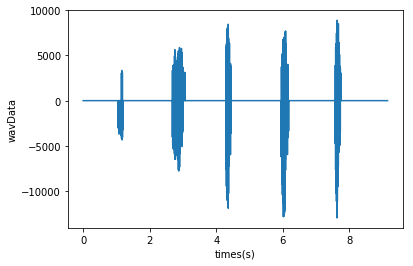

In [12]:

import pylab as plt 
import pydub
import numpy as np

from pydub import AudioSegment
import wave

# 读取mp3的波形数据
mp3_version = AudioSegment.from_file("E:\\REC20191109103531.mp3", format = 'MP3')

# 将读取的波形数据转化为wav
#mp3_version = AudioSegment.from_mp3("E:\\REC20191109103531.mp3") # 可以根据文件不太类型导入不同from方法

tp = mp3_version.set_frame_rate(8000).set_channels(1) # 设置声道和采样率
tp.export("E:\\test.wav", format='wav', codec='pcm_s16le',bitrate="192k") # codec此参数本意是设定16bits pcm编码器, 但发现此参数可以省略





f = wave.open("E:\\test.wav",'rb') #流
#读取格式信息  
#声道数, 量化位数（byte单位）, 采样频率, 采样点数
params = f.getparams()  
nchannels, sampwidth, framerate, nframes = params[:4]
print(nchannels, sampwidth, framerate, nframes)
#读取波形数据  
#读取声音数据，传递一个参数指定需要读取的长度（以取样点为单位）  
str_data  = f.readframes(nframes)    #返回的是二进制数据 type==bytes  如\x00\x00 两个两位16进制数，两个bytes，构成一个采样值。故用np.short
print(type(str_data))
#print(str_data)
f.close()
#将波形数据转换成数组
#需要根据声道数和量化单位，将读取的二进制数据转换为一个可以计算的数组  
wave_data = np.fromstring(str_data,dtype = np.short)  #1D数组   np.short. 16-bit signed integer
#print(wave_data.size)   #size == nframes 采样点数 73152/8000=9.144 s
#print(type(wave_data))
#print(wave_data)
#print(np.min(wave_data))   #min -12971 max 8893
#print(np.max(wave_data))   #因为是单声道，所以每个采样点对应bytes就是那个时间的数据;若是双声道,为LRLRLRLR，每个时间点的左右数据;

#阈值   设定下限 ±1000 ,低于阈值认为是噪音
len = wave_data.size
for i in range(0,len):
    if (wave_data[i]<3000)and(wave_data[i]>-3000):
        wave_data[i]=0
#print(wave_data)

#time 也是一个数组，与wave_data配对形成系列点坐标
times=np.arange(0,nframes)/framerate


plt.figure(1) 
plt.plot(times,wave_data)  
plt.ylabel("wavData")
plt.xlabel("times(s)")  
my_x_ticks=np.arrange(0,10,0.5)
my_yticks=np.arrange(-15000,10000,1000)
plt.yticks(my_yticks)
plt.xticks(my_x_ticks)
plt.show() 



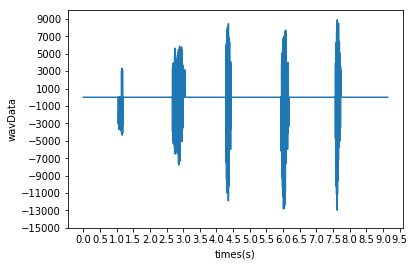

In [15]:

plt.figure(1) 
plt.plot(times,wave_data)  
plt.ylabel("wavData")
plt.xlabel("times(s)")  
my_x_ticks=np.arange(0,10,0.5)
my_yticks=np.arange(-15000,10000,2000)
plt.yticks(my_yticks)
plt.xticks(my_x_ticks)
plt.show() 

In [3]:
#20ms 一帧 0.02*8000=160 采样点 共73152个点，最后不足的帧舍弃
#窗函数 https://www.zhihu.com/question/50402321
#分帧 https://www.zhihu.com/question/52093104
# 一帧20ms hamming 加窗 不重叠
import numpy as np
import wave
import math
import os
import librosa
from scipy.io import wavfile

    
def enframe(wavData, frameSize, overlap): #overlap 重叠
    coeff = 0.97 # 预加重系数
    wlen = wavData.size
    step = frameSize - overlap # 距离
    frameNum= int(math.ceil(wlen / step))
    frameData = np.zeros((frameSize, frameNum)) #frameNum列，frameSize行
    hamwin = np.hamming(frameSize)
    for i in range(frameNum):
        singleFrame = wavData[np.arange(i * step, min(i * step + frameSize, wlen))] #取一帧长的数据
        singleFrame = np.append(singleFrame[0], singleFrame[:-1] - coeff * singleFrame[1:]) # 预加重 不含最后一位-不含第一位
        frameData[:singleFrame.size, i] = singleFrame
        frameData[:, i] = hamwin * frameData[:, i] # 加窗 第i列为第i帧数据

    
    return frameData

# 计算每一帧能量  短时能量=该段语音取样值的平方和
def energy(frameData): 
    frameNum = frameData.shape[1]

    ener = np.zeros((frameNum, 1))

    for i in range(frameNum):
        singleframe = frameData[:, i]
        ener[i] = sum(singleframe * singleframe)

    return ener




framelen = 160
overlap = 0
origin=wave_data
frameData = enframe(origin, framelen,overlap)
print("-" * 10)
#print(frameData)
#print(np.min(frameData))
#print(frameData.shape)   (160,458) 458*160=73280
ener=energy(frameData)

framenum=frameData.shape[1]
poinum=framenum*160
print(poinum)
print(framenum)



----------
73280
458


In [4]:
def get_auto_corr(k,frameData,framelen,framenum):   #对每一帧求短时自相关函数,求和
        ret=0
        Rn=0
        for n in range(0,framenum): #每帧
            Rn=0
            for i in range(0,framelen-k):
                #if frameData[i,m]!=0 and frameData[i+k,m]!=0:
                Rn=Rn+frameData[i,n]*frameData[i+k,n]
            ret=ret+Rn
        return ret

pitch=0;
temp=0;
for k in range(20,101):
    a=get_auto_corr(k,frameData,framelen,framenum)
    if temp<=a:
        temp=a
        pitch=k
print(pitch)    # k ==pitch  音调 75hz


75


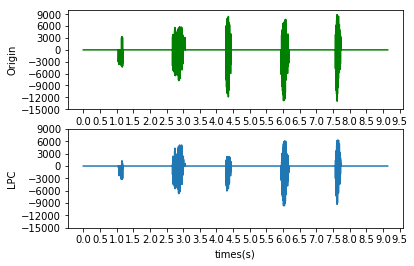

In [20]:
def LPCAuto(wavData, frameSize, overlap,p):  #p阶 输出LPCData为预测的数据
    coeff = 0.97 # 预加重系数
    wlen = wavData.size
    step = frameSize - overlap # 距离
    frameNum= int(math.ceil(wlen / step))
    hamwin = np.hamming(frameSize)
    LPCData = np.zeros((framelen, frameNum))
    LPCwavData=np.zeros(wlen)
    
    
    
    for i in range(0,wlen):
        cnt=0
        temp=0
        for j in range(1,p+1):
            if (i-j)>=0:
                cnt=cnt+1
                temp=temp+wavData[i-j]
        if cnt!=0:
            LPCwavData[i]=temp*1.0/(cnt*1.0)
    times=np.arange(0,nframes)/framerate
    plt.figure(1)      
    plt.title("Compare.wav's Frames")
    plt.subplot(2,1,1)
    plt.plot(times, wavData, color='green')
    plt.ylabel("Origin")
    plt.xlabel("times(s)")
    my_x_ticks=np.arange(0,10,0.5)
    my_yticks=np.arange(-15000,10000,3000)
    plt.yticks(my_yticks)
    plt.xticks(my_x_ticks)
    plt.subplot(2,1,2)
    plt.plot(times, LPCwavData)
    plt.ylabel("LPC")
    plt.xlabel("times(s)")
    my_x_ticks=np.arange(0,10,0.5)
    my_yticks=np.arange(-15000,10000,3000)
    plt.yticks(my_yticks)
    plt.xticks(my_x_ticks)
    plt.show()
    
    for i in range(0,framenum):
        singleFrame = LPCwavData[np.arange(i * step, min(i * step + frameSize, wlen))]
        singleFrame = np.append(singleFrame[0], singleFrame[:-1] - coeff * singleFrame[1:]) # 预加重 
        LPCData[:singleFrame.size, i] = singleFrame
        LPCData[:, i] = hamwin * LPCData[:, i] # 加窗  (因为计算原始信号能量时按照加窗后计算，所以预测也按照加窗)
    return LPCData
        




p=10
LPCData=LPCAuto(origin,framelen,overlap,p)




In [1]:
#上图中分别为0,1,2,3,4的采样。对每个字取0.2s (10帧)，进行预测增益计算  E0/(E0-EP)  原始能量/残差能量(实际-预测)


#0 1.0-1.2 50-60
#取1,(2.8s-3.0s),对应帧为 2800/20=140，3000/20=150  (130-160)帧。
#2 4.2-4.4 210-220
#3 6.0-6.2 300-310
#4,  7.6-7.8s  (380-390)帧

LPCener=energy(LPCData)

E0=0 #原始信号能量
for i in range (50,60):
    E0=E0+ener[i]
EP=0
for i in range (50,60):
    EP=EP+LPCener[i]  
print ("0's E0/EP is %f"%(E0*1.0/(EP-E0)))


E0=0 #原始信号能量
for i in range (140,150):
    E0=E0+ener[i]
EP=0
for i in range (140,150):
    EP=EP+LPCener[i]  
print ("1's E0/EP is %f"%(E0*1.0/(EP-E0)))


E0=0 #原始信号能量
for i in range (210,220):
    E0=E0+ener[i]
EP=0
for i in range (210,220):
    EP=EP+LPCener[i]  
print ("2's E0/EP is %f"%(E0*1.0/(EP-E0)))


E0=0 #原始信号能量
for i in range (300,310):
    E0=E0+ener[i]
EP=0
for i in range (300,310):
    EP=EP+LPCener[i]  
print ("3's E0/EP is %f"%(E0*1.0/(EP-E0)))


E0=0 #原始信号能量
for i in range (380,390):
    E0=E0+ener[i]
EP=0
for i in range (380,390):
    EP=EP+LPCener[i]  
print ("4's E0/EP is %f"%(E0*1.0/(EP-E0)))

# 取2帧 140 141

print ("Frame 140's E0/EP is %f"%(ener[145]*1.0/(LPCener[145]-ener[145])))
print ("Frame 141's E0/EP is %f"%(ener[300]*1.0/(LPCener[300]-ener[300])))

NameError: name 'energy' is not defined

In [31]:
?np.fromstring

In [33]:
?np.short

In [34]:
?bytes

In [71]:
?acf


Object `acf` not found.
